# Advanced techniques for EDA

## Assembling datasets (a refresher)
Often you will get data from different sources and you will have to assemble those data in a single dataset to perform EDA.

In a previous module you should have been taught about the following methods:

* `pd.concat()` concatenate dataframes along a the specified axis (adds as columns or adds as rows)
* `pd.merge()` merge dataframes by specifying a type of join (like in SQL) with a `how=` argument to determine what kin of join to perform (`'left'`, `'right'`, `'outer'`, `'inner'`, `'cross'`), with ̀`'inner'` as default.
* `df.join()` to join columns of other dataframes on index or a given column of `df`. The `how=` argument determine what kind of join to perform (`'left'`, `'right'`, `'outer'`, `'inner'`, `'cross'`), with ̀`'left'` as default.

The difference between `df.join()` and `pd.merge()` is that `df.join()` is an (df) instance method: you call it on a dataframe and pass it another dataframe as argument.

If you need a refresher follow this article/tutorial (and of course read also the pandas documentation):

[https://realpython.com/pandas-merge-join-and-concat/](https://realpython.com/pandas-merge-join-and-concat/)

## Regressions and `statsmodels`

Regressions are the most important models in data analysis (statistics), data science, and machine learning.

Regressions models are:

* very simple from a mathematical point of view (linear relationship)

* easy to interpret

* sober (requires few computational resources)

* in statistical analysis, it is a reference model relationships between a quantitative variable and one or more other quantitative variables

* in machine learning, regression belongs to the family of supervised learning

* it is a well-known model: the most common optimization method (least squares or OLS) has been known for a long time (Legendre, then Guauss… in astronomy), and the term regression was also coined in the 19th century by Galton in the context of research in physical anthropology – regression is actually the abbreviation for "regression toward the mean."

In an [article](https://www.kdnuggets.com/2018/12/supervised-learning-model-popularity-from-past-present.html) on KDnuggets, [Matthias Döring](https://www.linkedin.com/in/matthias-doering/) provides [a dataset listing the number of publications regarding the machine learning methods used](https://www.datascienceblog.net/data-sets/ml_models_timeline.csv) (download the dataset in your `data/` folder).

It appears from this data that linear regression is the most widely used method in the field of machine learning. This is even more true when considering all the variants (logistic, Poisson, Cox, ridge, lasso, etc.). Only SVM (a very effective method in the field of classification) could compete:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ml_timeline = pd.read_csv('data/ml_models_timeline.csv')
df_ml_timeline.head()

,Year,Model,Count
0,1950,Neural Network,10
1,1951,Neural Network,18
2,1952,Neural Network,11
3,1953,Neural Network,23
4,1954,Neural Network,15


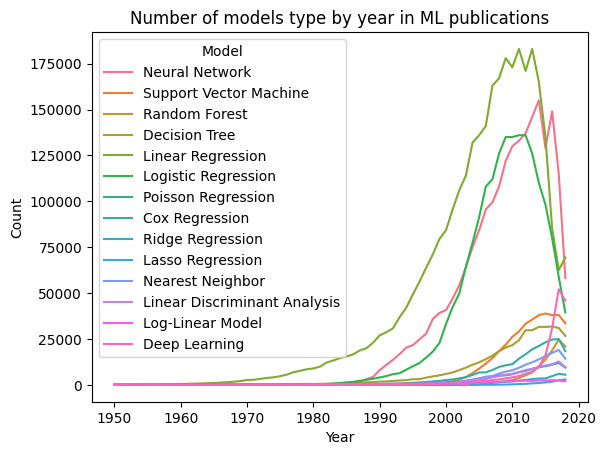

In [3]:
sns.lineplot(data=df_ml_timeline, x='Year', y='Count', hue='Model').set_title('Number of models type by year in ML publications');

### `statsmodels`

The reference library for ML is `scikit-learn`. But if we stick to a data exploration and analysis approach, the [`statsmodels` library](https://www.statsmodels.org/stable/index.html) is very interesting: it's very easy to use with a formula API that uses the patsy notation format, with which R users are already familiar.

To install it:

In [4]:
!pip install statsmodels


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


We will follow the same steps as those we follow each time we specify a model:

* Import the modules containing the models
* Assign the variables (explained and explanatory)
* Define the model and the estimation method (in the case of simple regression, the estimation will be done using the ordinary least squares (OLS) method ([a page](https://setosa.io/ev/ordinary-least-squares-regression/index.html) to understand how the OLS estimator works interactively)
* Estimate the model parameters using a method generally called `.fit()`
* Read and interpret the results and evaluate the model's performance, aided by numerous statistical indices (confidence intervals, standard error, *R*<sup>2</sup>, Fisher index, etc.)

Before that, let’s load some (well known) data:

In [5]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Linear regressions (simple and multivariate)

#### `statsmodels` standard API

The reference library for ML is [scikit-learn](https://scikit-learn.org/stable/index.html). But if we limit ourselves to a data exploration and analysis approach, the statsmodels library is very interesting: it's very easy to use with a formula API that uses the [patsy](https://patsy.readthedocs.io/) notation format, with which R users are already familiar.

Simple linear regression is a linear model, which mean it suppose a proportional relationships between explained and explanatory variables:

$$ Var_{explained} = \beta . Var_{explanatory} + \alpha $$

*β* is the slope of the regression line, and *α* the intercept. The challenge will be to determine the values of the parameters *β* and *α*. 

For example, for a regression of tip amounts on bill amounts:

In [6]:
import statsmodels.api as sm # import the classical statsmodel module api

In [7]:
Y= tips_df['tip'].tolist() # declare explained variable
X = tips_df['total_bill'].tolist() # declare explanatory variable
X = sm.add_constant(X) # add a constant term (intercept)
model = sm.OLS(Y, X) # instantiate the model, chose OLS estimation method
result = model.fit() # estimates the parameters
result.params # show parameters values

array([0.92026961, 0.10502452])

The `.summary()` method gives us the main statistical indicators, error, significance test, etc. :

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           6.69e-34
Time:                        22:58:51   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
x1             0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* In the top left corner, you will find a summary of the model (variables, datatype, estimation method, etc.) and characteristics of the sample (number of observations, degrees of freedom, etc.)
* In the top right corner, you will find the statistical indices that apply to the model as a whole: Fisher, *r<sup>2</sup>, AIC (useful for comparing models), etc.
* At the bottom, you will find, parameter by parameter, the standard error, their significance (Student t-test), confidence interval, etc.

Reminder about the Fisher index: corresponds to the null hypothesis "all parameters are equal to 0." The larger the value of *F*, the more likely the model is to be statistically significant, meaning that at least one of the parameters is significantly different from 0. If the value of *F* is close to 1, then the null hypothesis cannot be rejected. Please note that *F* is an index with degrees of freedom, notably related to the sample size and the number of model parameters. For each sample size and each model (especially when considering multiple variables, and therefore multiple parameters), the significance threshold associated with *F* has a specific value.

Objects related to the model (returned by `.OLS()`) and to the result (returned by `.fit()`) have each specific attributes and methods.

* The model variables/parameters are accessible via the `.endog_names` (endogenous variable are explained variables) and `.exog_names` (exogenous variables are explanatory variables) attributes:

In [9]:
model.endog_names

'y'

In [10]:
model.exog_names

['const', 'x1']

Alas `y` and `x1` gives not a lot of informations. Fortunatelly `statsmodl` propose another API, that propose a more readable format.

#### `statsmodel`patsy API

One specificity of `statsmodel` is that it has two API. One standard, and the other following the patsy format. The standard methods are written using uppercase (`.OLS()`) and the methods taking patsy formula are written using lowcase (`.ols()`). You have to import he `smf` to use patsy API: 

In [11]:
import statsmodels.formula.api as smf

In [12]:
model = smf.ols(formula = 'tip ~ total_bill', data=tips_df)
result = model.fit()
result.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

This API use more readable format and give more readable outputs.

* The object returned by this `.ols()` method also has the `.endog_names` and `.exog_names` attributes – here also more readable – but also the `.formula` attribute:

In [13]:
model.endog_names

'tip'

In [14]:
model.exog_names

['Intercept', 'total_bill']

In [15]:
model.formula

'tip ~ total_bill'

* of course, the `.summary()` method is also available:

* Some indices can be directly accessed as attributes of the object returned by the `.fit()` method (which we named `result`):

In [16]:
result.rsquared

np.float64(0.45661658635167646)

* the object returned by the `.fit()` method has a `.predict()` method that allows you to generate the values predicted by the model for a given explanatory variable values. It is often used by giving it the actual values of the independent variables as arguments in order to compare predicted values with observed values:

In [17]:
result.predict(tips_df['total_bill']).head()

0    2.704636
1    2.006223
2    3.126835
3    3.407250
4    3.502822
dtype: float64

* Be careful, if we do not use the `patsy` formalism for our model (i.e. we use the standard API method `.OLS()`, and not `.ols()`), we must add a column for the intercept with the `.add_constant()` method:

In [18]:
model2 = sm.OLS(Y, X) # X and Y as defined above
result2 = model.fit()
predicted_tips = result2.predict(sm.add_constant(tips_df['total_bill']))
predicted_tips.head()

0    2.704636
1    2.006223
2    3.126835
3    3.407250
4    3.502822
dtype: float64

* If we want to make a prediction from a single value (for example, what is the tip for a $50 bill?), the model described with the `patsy` formalism still expects a DataFrame, a PandasSeries or at list a dictionnary (there must be a key):

In [19]:
result.predict({'total_bill': 50.0})

0    6.171495
dtype: float64

We can use predictions to plot the regression line:

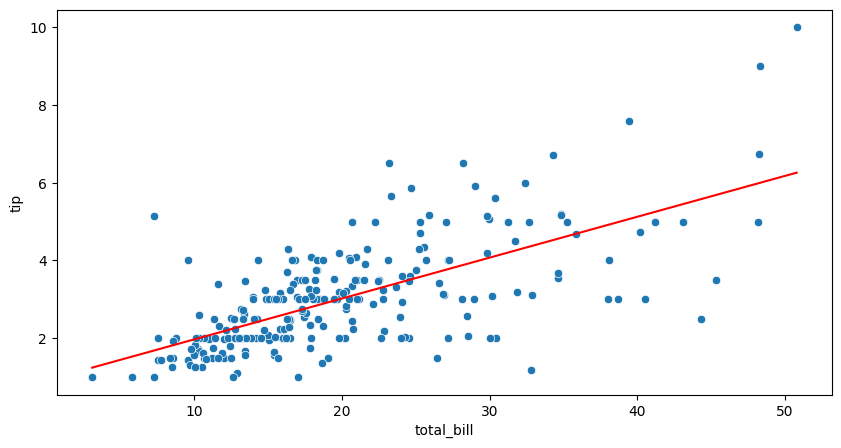

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='total_bill', y='tip', data=tips_df, ax=ax)
sns.lineplot(x=tips_df['total_bill'], y=predicted_tips, color='r', ax=ax);

#### Categorical variables

In regression explained and explanatory variables are quantitative. But we can use it to manage categorical variables, simply by using encoding. The simplest encoding is for binary variable : we can simply use 0 and 1 to code the two categories. For example 0 for male, and 1 for female. 

We just have to tell to `statsmodels` that we want to use a categorical variable in the formula:

In [21]:
model_cat = smf.ols(formula='tip ~ C(sex)', data=tips_df)
model_cat.fit().params

Intercept           3.089618
C(sex)[T.Female]   -0.256170
dtype: float64

The intercept is the predicted value for the default group (here the `male` group, encoded by `0`), and the parameter associated to `female` (the slope) shows how much the explained variable changes when we “move” from the `male` group to the `female` group.

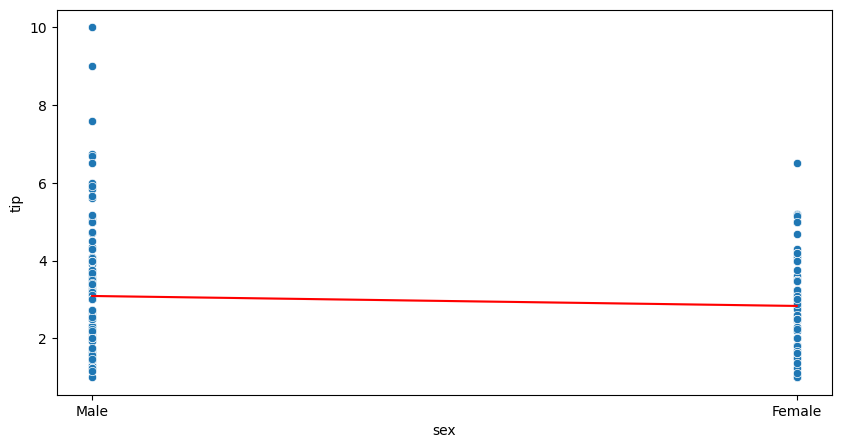

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x='sex', y='tip', data=tips_df, ax=ax)
sns.lineplot(x=tips_df['sex'], y=model_cat.fit().predict(tips_df['sex']), color='r', ax=ax);

It’s up to you to examine this model `.summary()` to see if it is a reliable model or not.

For more complex category (with more than two category), we will represent each category by a binary variable, and create a model taking all those variables, we will see this in the multivariate regression section below. Let's first address the residuals analysis.

#### Residuals analysis

Regression is a powerful tool, but it cannot be used indiscriminately. There are specific conditions for the validity of this type of model:

* random sampling
* independent sampling (reminder: sampling with replacement is acceptable if n < 10% of the population)
* homoscedasticity (normal distribution of residuals, and equal variance of residuals)

While the first two conditions are verifiable by evaluating the sampling method chosen, verifying homoscedasticity requires specific analyses.

The first step is a visual inspection. To do this:

- calculate the values predicted by the model
- subtract the observed values: this gives us the residuals (error)
- display a histogram of the residuals: the mean should be around 0 and the distribution look normal (you can perform a normality test)
- finally, display a scatterplot between the predicted values and the residuals. Check that no pattern appears.

##### Distribution of residuals

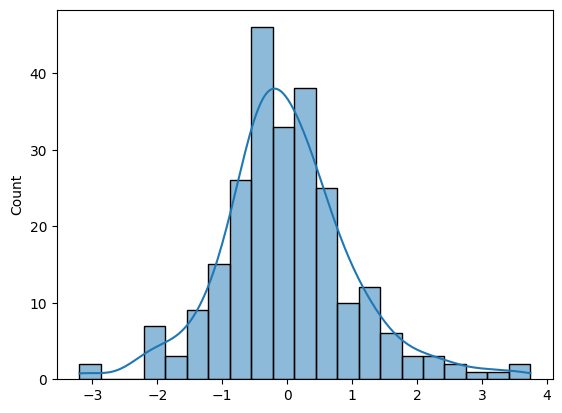

In [23]:
predicted_tips = result.predict(tips_df['total_bill'])
residuals = tips_df['tip'] - predicted_tips 
sns.histplot(residuals, kde=True);

Actually, the `Results()` class of `statsmodels` has a `.resid` attribute that allows direct access to the residuals:

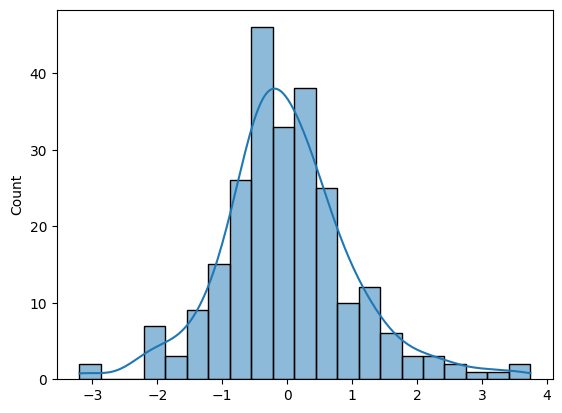

In [24]:
sns.histplot(result.resid, kde=True);

##### Visual inspection: QQ-plot

There is a method to quickly graphically assess whether a distribution is normal: QQ plots.

1. Calculate the quantiles for our data and note the values
2. Look at where these values/quantiles fall on a normal distribution
3. Plot a scatterplot of the quantile values of our data (actual) against the quantiles of the normal distribution (theoretical).
4. If the residuals are distributed according to a normal distribution, we should see a straight line. If not, there is a "distortion" in the distribution relative to a normal distribution

![Theoretical normal distribution](./images/Empirical_Rule.PNG)
By Dan Kernler - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36506025

[A Statquest video](https://www.youtube.com/watch?v=okjYjClSjOg) where the procedure is explained step by step.

`statsmodels` has a `.qqplot()` method:

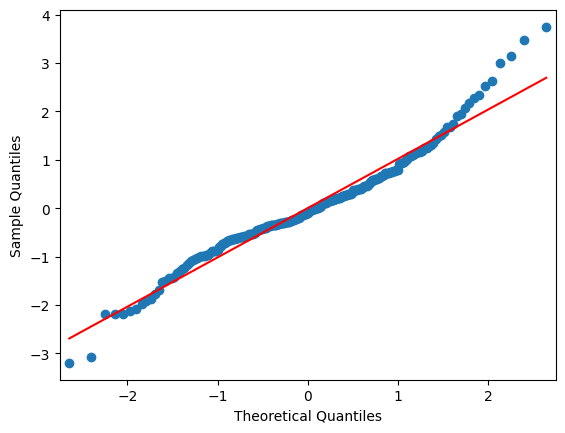

In [26]:
sm.qqplot(residuals, line='s');

##### Residuals vs. Predicted Values scatterplot to check trends

Rather than drawing a simple `scatterplot()`, you can use a `regplot()` to get a hint of trends:

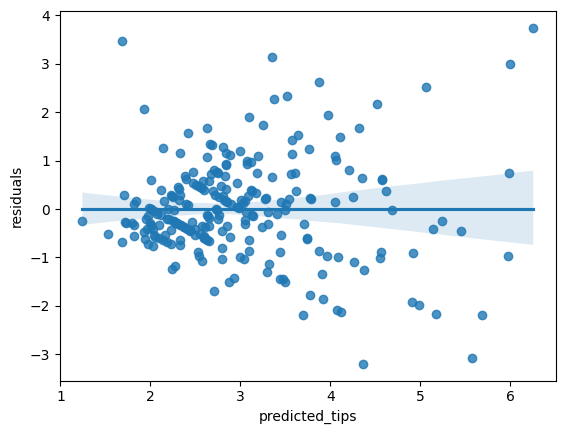

In [27]:
g = sns.regplot(x=predicted_tips, y=residuals)
g.set_xlabel('predicted_tips')
g.set_ylabel('residuals');

##### Interpreting the residuals?

In our example, while the distribution appears perfectly normal (perhaps with a slight skew), we can clearly see a pattern in the residuals vs. predicted/fitted plot: the variance increases slightly for the predictions of the highest tips (which we already suspected from observing the raw data). It is possible that another variable or a particular phenomenon is involved in the process causing the high tips.

We can observe all sorts of patterns, but generally what alerts us is an increase (or decrease) in variance. This is often a sign that another variable is involved.

What should we do in this case? We remain focused on data exploration and preparation:

* look for other variables that may be involved
* see if a transformation of the variable (`log()`, etc.) improves things
* opt for a different model (perhaps the relationship between variables is not linear).

Note: be wary of temporality (the phenomenon of inflation over time is very common, or periodicity), again, we need a good understanding of the phenomena, observations, acquisition methods, business knowledge... in order to take into account all the factors that can have an influence.

##### Heteroscedasticity tests

There are two heteroscedasticity tests, the Breusch-Pagan and White tests, accessible with `het_breuschpagan` and `het_white` respectively in the `diagnostic` module:

* *Breusch-Pagan*: regression of the squared residuals on the independent variables. Null hypothesis: no heteroscedasticity. If the test is significant, then this suggests that the homoscedasticity conditions are not met.

* *White*: tests a relationship between the squared residuals and the independent variables (without any specific assumptions about the type of relationship, unlike the Breusch-Pagan test). As before, a significant test suggests that the homoscedasticity conditions are not met.

Let’s run a Breusch-Pagan test (a constant term must be added to the independent variables tested with `.add_constant()`):

In [28]:
import statsmodels.stats.diagnostic as smd

In [29]:
bp_test_results = smd.het_breuschpagan(resid=result.resid, exog_het=sm.add_constant(tips_df['total_bill']))
bp_test_results

(np.float64(47.87649804810729),
 np.float64(4.539304189768232e-12),
 np.float64(59.075594777437374),
 np.float64(3.7855107811770134e-13))

All regression parameters are (heavily) significant: the homoscedasticity conditions are not met. Too bad.

White test (which makes no assumptions about the form of the functional relationship between the residuals and the independent variable):

In [30]:
w_test_results = smd.het_white(resid=result.resid, exog=sm.add_constant(np.asarray(tips_df['total_bill'])))
w_test_results

(np.float64(59.94872593718976),
 np.float64(9.600626274967766e-14),
 np.float64(39.24896207437351),
 np.float64(1.7565265345404497e-15))

The White test does not bring better conclusions…

#### Multivariate regressions

Simple regression models a linear relationship on one dimension (only one independant variable). When you consider several explaining variables simultenaously, each variable explain some part – of different importance – of the variance of the explained variable. Multivariate regression is a linear combination: 

$$ Var_{explained} = \beta_{1} . Var_{explaining_1} + \beta_{2} . Var_{explaining_2} + … +\beta_{n} . Var_{explaining_n} + \alpha $$

The estimation of which part an explaining variable explains, consists in the estimation of a parameter plus a constant term (*intercept*). The model is specified like the simple regression model has been specified:

In [31]:
multi_model = smf.ols(formula='tip ~ total_bill + size', data=tips_df)
multi_result = multi_model.fit()
multi_result.params

Intercept     0.668945
total_bill    0.092713
size          0.192598
dtype: float64

In contrast, interpretation is more complex. For exemple, the `total_bill` parameter value of 0.092713 means that if the total bill increase of 1\\$, the tip will increase of 0.092713\\$, *with all the other variables remaining constant*. If other variables change at the same time, they will also induce variations of the tip and the interpretation will be impossible. You have to block all variables and change a unique variable to be able to interpret its effect. It’s the foundation of the scientific method.

##### Model quality (refresher)

As *r* (correlation) shows the linear relationships between two variables only, *r<sup>2</sup>* can’t be used to asses the quality of a multivariate model.

Using residuals – residuals being the variance part that can’t be explained by our model (errors) – the best our model is, the smaller the residuals are. Using the sum of squares (SS) we can define a *R<sup>2</sup>* index :

$$ 1 - \frac{SC_{residuals}}{SC_{mean}} = R^{2}$$

This index is called *R<sup>2</sup>* just by analogy with *r<sup>2</sup>* as its maximum value is 1. But it is not a square number, it can be negative if the SS of the residuals is bigger than the mean SS.

Here’s how to interpret *R<sup>2</sup>* value:

* *R<sup>2</sup>* = 1 : all the variance is explained by the independant variables of the model.
* *R<sup>2</sup>* > 0 : our model makes better prediction than using the mean of observations (the most basic model is to predict the mean observed)
* *R<sup>2</sup>* = 0 : our model is equivalent to using the mean observed to make prediction
* *R<sup>2</sup>* < 0 : a linear model may be so unsuitable to data that a model that would just predict the mean observed would make less errors. According all probabilities, the relationships between the data are non-linear at best, or there is no relationship at all. 

In [32]:
multi_result.rsquared

np.float64(0.46786930879612587)

##### Part regression plots (dataviz) and residuals analysis

As there is a lot of variables, graphical representation of a multivariate regression is really challenging. We can represent a simple regression on a 2D plane, a 2 variables multivariate regression on a 3D space, but as the number of dimensions increases, a graphical representation has less sense. To overcome this difficulty, the simplest choice is to represent each variable / parameter pair independantly of the others (maintaining other variables constant), like we did when we wanted to interpret parameters.

The `.graphics.plot_partregress_grid()` method of `statsmodels` allow us to create a grid of graphical representations that follows this principle for each parameter/variable:

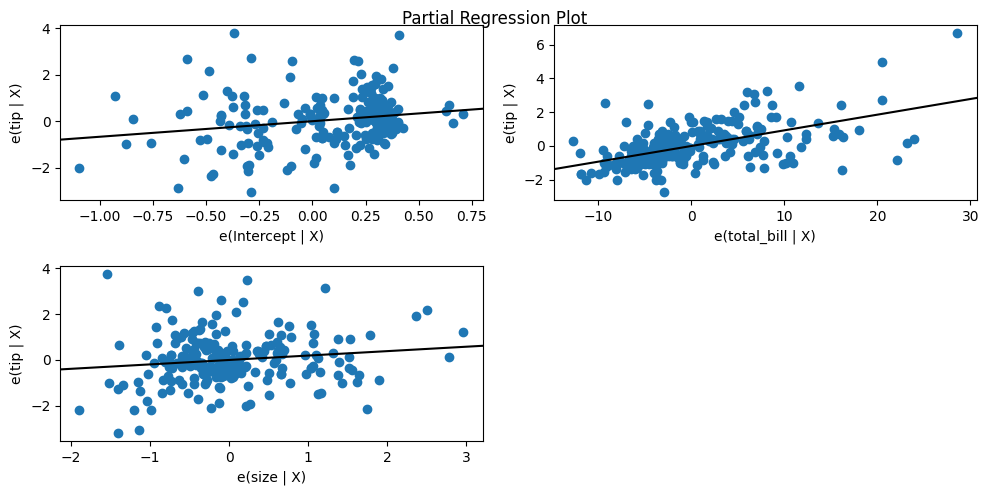

In [33]:
fig = plt.figure(figsize=(10, 5))
fig = sm.graphics.plot_partregress_grid(multi_result, fig=fig);

A partial regression plot is a form of residual analysis.

We want to see the effect of one variable on another, eliminating the effect of all other variables.
Other variables can have an effect on the variable we are trying to explain, but also on the explanatory variable we are considering in particular.
In our example, `size` can have an effect on `tip`, but also on `total_bill`. So if we want to isolate the exclusive effect of `total_bill` on `tip`, we must find a way to eliminate the influence of `size`.

![Venn diagramm to show explains part of variance by multivariate regression](./images/Venn-regression-eng.png)

This is where residuals come in: if we try to isolate the part of `tip` explained exclusively by `total_bill`, we must remove the part of `total_bill` explained by `size`, and the part of `tip` explained by `size`. But this is exactly what residuals are:

- the residual from the regression of `tip` on `size` is the portion of the variance of `tip` not explained by `size`

- the residual from the regression of `total_bill` on `size` is the portion of the variance of `total_bill` not explained by `size`

So, the regression of the residual of (`tip` on `size`) on the residual of (`total_bill` on `size`) is the portion of `tip` explained exclusively by `total_bill`

So, to plot the partial regressions, for each variable:

- 1. We perform a regression excluding the independent variable considered - for example, `total_bill` (i.e., we create a model explaining `tip` by all the variables other than `total_bill` – here, `size`, but we could have a more complex model with more variables). We obtain the residuals `e(tip|X)` from this regression.

- 2. We then perform a regression of the independent variable considered (`total_bill` in our example) and the other variables, and we obtain the residuals `e(total_bill|X)`.

- 3. Finally, we plot a scatterplot of the residuals (in our example, `e(tip|X)` on `e(total_bill|X)`) and the associated regression line.
- The y-axis indicates the residual values of the model containing all variables except the variable of interest (`total_bill`): this represents all the errors that remain after taking into account variables other than `total_bill`.
- The x-axis indicates the residual values of the model explaining the variable of interest (`total_bill`) by all the others: the variance observed is not due to the other variables.

- For the resulting regression line, the intercept is necessarily zero, and the slope of the line is the "strength" of the explanation of the variance of `tip` by `total_bill`, independently of the other variables. These graphs also allow us to see which points (which do not represent the observed data, but rather the interpolations based on the errors) pose problems with the largest errors:
- on the x-axis: the points furthest from 0 (positive or negative) are the points for which the variable of interest (`total_bill`) has a value unexplained by the other variables (with the largest error)
- on the y-axis: the points furthest from 0 (positive or negative) are the points for which the private model of `total_bill` explains the point's value the least (with the largest error)
- therefore, these are the points that "play" the most in the explanation of `tip` by `total_bill`

When interpreting these graphs, the variables that contribute the most to explaining the variance are those for which the steepest slope is observed. Each plot is centered on 0 using the same units, with the other variables fixed (at their mean values).

It is important to remember that the points do not represent the observed data (clue: the `size` variable should only have integer values). To better identify the points, we can use the `obs_labels` flag of the `.plot_partregress()` method which plots a specific graph (not in *grid*), and for which we must explicitly indicate the dependent (or endogenous) variable, the independent variable of interest, and the other independent variables:

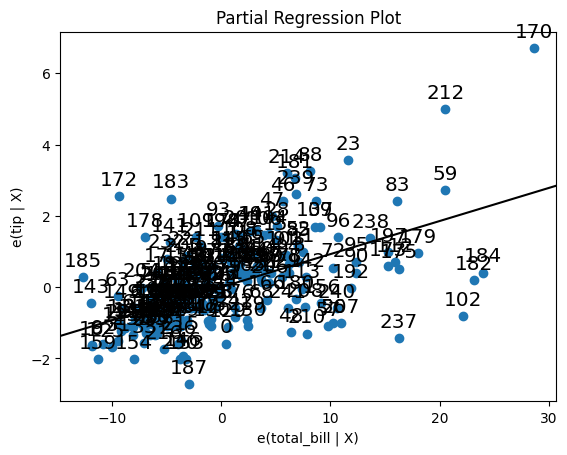

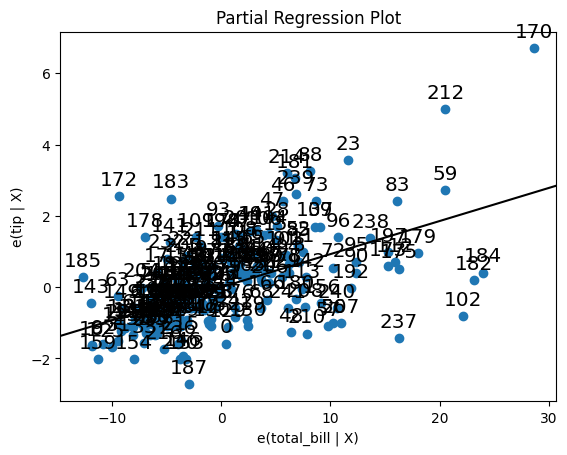

In [34]:
sm.graphics.plot_partregress(endog='tip', exog_i='total_bill',
                              exog_others=['size'],
                              data=tips_df, obs_labels=True)

##### Categorical variables

In the simple regression section, we learned that simple regression couldn’t manage categorical variables if they were not binary (with more thant two categories). As multivariate regression can use several binary variables, it can help us:

In [35]:
tips_df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [36]:
multi_model = smf.ols(formula='tip ~ C(day)', data=tips_df)
multi_result = multi_model.fit()
multi_result.params

Intercept        2.771452
C(day)[T.Fri]   -0.036715
C(day)[T.Sat]    0.221652
C(day)[T.Sun]    0.483680
dtype: float64

A category is associated to the *intercept*. It is the baseline from which all parameters will be interpreted: 

* the model predict 2,77\\$ tips on thursday (average tip on this day), 
* a decrease of -0,04\\$ on friday, 
* an increase (in comparison with thursday tips) of 0,22\\$ on saturday 
* an increade (always in comparison with thursday tips) of 0,48\\$ on sunday

If we want that each parameter refelct the mean tip on each day (category), the baseline has to be set at 0, that is supress the intercept. In this case, we have to write the formula by simply adding `-1`:

In [37]:
multi_model = smf.ols(formula='tip ~ C(day) -1', data=tips_df)
multi_result = multi_model.fit()
multi_result.params

C(day)[Thur]    2.771452
C(day)[Fri]     2.734737
C(day)[Sat]     2.993103
C(day)[Sun]     3.255132
dtype: float64

##### Multicolinearity

By considering simulteanously multiple variables, multivariate regression introduces a lethal threat : multicolinearity. It’s a complex word to say that variables have mutual influence on each other. Multicolinearity can just be a covariance, or in a worst case scenario a complete dependancy. Effects on a regression can be devastating.

Let’s see how it looks like, by building a fully colinear variable:

In [38]:
tips_df['var_col'] = 3 * tips_df['size'] - 0.5 * tips_df['total_bill']
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,var_col
0,16.99,1.01,Female,No,Sun,Dinner,2,-2.495
1,10.34,1.66,Male,No,Sun,Dinner,3,3.830
2,21.01,3.50,Male,No,Sun,Dinner,3,-1.505
3,23.68,3.31,Male,No,Sun,Dinner,2,-5.840
4,24.59,3.61,Female,No,Sun,Dinner,4,-0.295


When we inject this variable in a multivariate model along with `'size'` and `'total_bill'` from whom `'var_col'` is derived: 

In [39]:
col_model = smf.ols(formula='tip ~ total_bill + size + var_col', data=tips_df)
col_result = col_model.fit()
col_result.params

Intercept     0.668945
total_bill    0.118637
size          0.037055
var_col       0.051847
dtype: float64

Parameters values have dramatically changed !

In [40]:
col_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           9.67e-34
Time:                        23:04:34   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001       0.288       1.050
total_bill     0.1186      0.010     11.741      0.000       0.099       0.139
size           0.0371      0.010      3.834      0.000       0.018       0.056
var_col        0.0518      0.025      2.054      0.041       0.002       0.102
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                     6.41e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

At first sight, everything seem ok. But can you notice the note #2 below the table: it’s an advertisement of "strong colinearity probles".

Let’s very very slightly modify the data, by increasing a variable by 1% :

In [41]:
tips_df.loc[0, 'total_bill'] = tips_df.loc[0, 'total_bill'] * 1.01
col_model = smf.ols(formula='tip ~ total_bill + size + var_col', data=tips_df)
col_result = col_model.fit()
col_result.params

Intercept      0.686183
total_bill    -9.584688
size          58.252806
var_col      -19.354907
dtype: float64

New parameters values have nothing to do with previous one! Parameters estimation is completely unstable.

In [42]:
col_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     71.96
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           3.14e-33
Time:                        23:04:36   Log-Likelihood:                -346.68
No. Observations:                 244   AIC:                             701.4
Df Residuals:                     240   BIC:                             715.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6862      0.193      3.550      0.000       0.305       1.067
total_bill    -9.5847      5.962     -1.608      0.109     -21.330       2.161
size          58.2528     35.772      1.628      0.105     -12.215     128.721
var_col      -19.3549     11.925     -1.623      0.106     -42.846       4.136
==============================================================================
Omnibus:                       25.623   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.975
Skew:                           0.555   Prob(JB):                     2.32e-11
Kurtosis:                       4.893   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

And estimated parameters significance has deteriorated.

Thus, full colinearity results in high instabillity in parameters estimation, as the slightest alteration of the data lead to loss of significance, completely different estimated values, etc.

Of course full colinearity is rare in the real world, unless variables are constructs not so wisely build. But even partial colinearity can have its effects. Try to create a colinear variable, but add some noise to it (add random values when calculating its values), and see  what are the effects on a model:  

In [43]:

# your code here



##### Managing colinearity

How, at least, do we detect colinearity?

A first insight can be obtained by looking at the correlation table: 

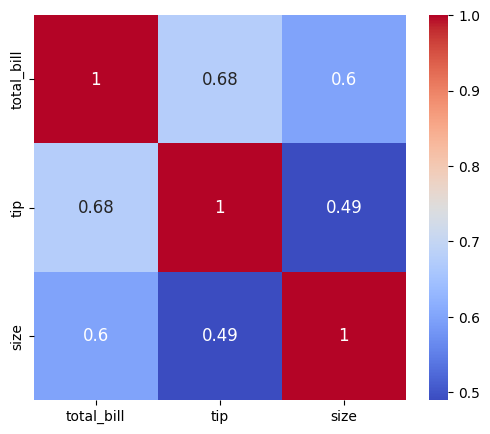

In [44]:
plt.figure(figsize=(6,5))
sns.heatmap(tips_df[['total_bill', 'tip', 'size']].corr(), 
            cmap='coolwarm', 
            annot = True, # display values in cells
            annot_kws={"size": 12}); # font size in cells

We see that `'size'` and `'total_bill'` are correlated. Maybe it’s not a good idea to take them both to build a model. It is intuitive that the bigger the size of the meal, the bigger the bill.

Other techniques have been developped to detect colinearity. One of them is to calculate the *variance inflation factor* (vif). It is designed to quantify the risk of colinearity: the higher the *vif*, the higher the risk. It is calculated as the inverse of the *R<sup>2</sup>* of the regression of variable on all the other variables. If *R<sup>2</sup>* approaches 1, *vif* tends to infinity.

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

This `vif` method must receive standardized data:

In [46]:
columns = ['size','tip','total_bill', 'var_col'] # only numerical variables
tips_std = pd.DataFrame()

for c in columns:
    m = tips_df[c].mean()
    sd = tips_df[c].std()
    tips_std[c] = tips_df[c].apply(lambda x: (x-m)/sd)

tips_std.head()

,size,tip,total_bill,var_col
0,-0.598961,-1.436993,-0.295066,-0.087088
1,0.452453,-0.967217,-1.061158,1.683808
2,0.452453,0.362610,0.137422,0.190096
3,-0.598961,0.225291,0.437348,-1.023632
4,1.503867,0.442111,0.539570,0.528876


In [47]:
vif(tips_std, 0) # 0 = index of the column considered

np.float64(278687.79245595855)

In [48]:
vif(tips_std, 1)

np.float64(1.8994711600549214)

In [49]:
vif(tips_std, 2)

np.float64(678107.3667372138)

In [50]:
vif(tips_std, 3)

np.float64(436711.3557867941)

Compare with results if we drop the `'var_col'`:

In [51]:

# your code here



We see various values for the *vif*. We understand that higher values are associated with higher risks of colinearity. But where is the limit ? Which values are acceptable and which are a no-go ?

It’s compliated because there can’t be absolute rules. There is no theoretical justifications, but by experience, it seems that a value above 10 is a redflag : you should start asking questions when this threshold is exceeded.

### Logistic regression

#### Some theory (quick refresher)

We have seen that we can use categorical variables as explanatory variables in linear regression by encoding each category with a binary variable (whose values are either 0 or 1).

But could we encode a categorical variable that we are trying to predict using binary encoding, and predict the outcome using regression?

Since the values to be predicted would be 0 or 1, even considering a continuum from 0 to 1, since linear regression predicts an outcome ranging from -∞ to +∞, this doesn't really work. Furthermore, binary data do not satisfy the condition of equality of variances (see the previous lecture and the `sex` -> `tip` model).

We would need to find a function that is continuous on [0; 1] and defined on ]-∞; +∞[. To put it simply, this is the case for the logistic function, whose definition is:

$$ f(x)=\frac{1}{1+e^{-(\alpha + \beta x)}} $$

The more observant will recognize the exponential as a linear formula... this function is therefore a transformation of the regression equation into a function on ]0; 1[, which is our objective:

In [52]:
import numpy as np
import matplotlib.pyplot as plt

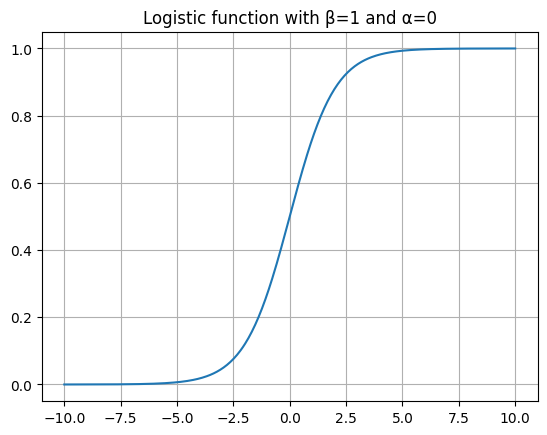

In [53]:
# define logistic function
def sigmoid(x, b=1, a=0):
    return 1 / (1 + np.exp(-b*x - a))

# generate x values
x = np.linspace(-10, 10, 400)
plt.plot(x, sigmoid(x))
plt.title('Logistic function with β=1 and α=0')
plt.grid();

What role do the coefficients or parameters *β* and *α* play?

* *α* is the offset of the function (shift to the left or right depending on the sign of *α*)
* *β* is the "inclination" or "slope" of the curve
*
Let's create a small script that varies these parameters and allows us to see this:

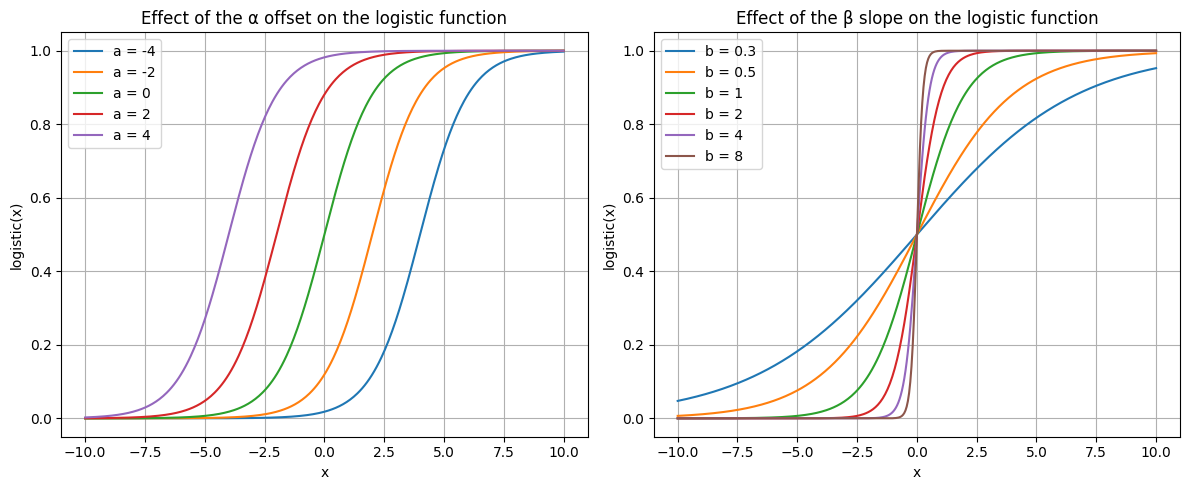

In [55]:

# Variations of a offset
a_values = [-4, -2, 0, 2, 4]
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for a in a_values:
    plt.plot(x, sigmoid(x, a=a), label=f"a = {a}")
plt.title("Effect of the α offset on the logistic function")
plt.xlabel("x")
plt.ylabel("logistic(x)")
plt.legend()
plt.grid()

# Variations of b slope
b_values = [0.3, 0.5, 1, 2, 4, 8]
plt.subplot(1, 2, 2)
for b in b_values:
    plt.plot(x, sigmoid(x, b=b), label=f"b = {b}")
plt.title("Effect of the β slope on the logistic function")
plt.xlabel("x")
plt.ylabel("logistic(x)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Note: a negative value of *β* would lead to an “inversion” of the curve (would go from “1 to 0” and not from “0 to 1”)

If the function is continuous and takes values between 0 and 1, how can it be used to predict a categorical variable?

In fact, the function will represent the *probability*, according to the model, that the explained variable belongs to one category (e.g., 0) or the other (1). To create a binary classifier from these continuous probabilities, we will set a threshold above (and below) which the predicted value will fall into one category or the other:

![Classification threshold on the sigmoid](./images/Classification-threeshold-eng.png)

Regarding the slope, this threshold defines two zones (a cutoff value of x) where the points will be classified as belonging to one category or another:

![Classification threshold on the sigmoid](./images/Classification-threeshold-zones-eng.png)

We note the existence of an "overlap" zone, where, compared to the actual data, there may be classification errors. Indeed, depending on the steepness of the slope, this zone can be more or less wide. Indeed, if for a given x we have a probability of 80%, this means that with the threshold, all these points will be classified as category 1, and therefore there will be a 20% error.

How can we assess the quality of the model?

Long story short, we use the log-likelihood :

We will seek to maximize a quantity by noting that:
* y<sub>predicted</sub> must be close to 1 when y<sub>observed</sub> is equal to 1
* (1 - y<sub>predicted</sub>) must be close to 1 when y<sub>observed</sub> is equal to 0

From this observation we will define the *maximum likelihood* or **Likelihood** as the product of (1 - y<sub>predicted</sub>) when the observation is equal to 0 and y<sub>predicted</sub> when the observation is equal to 1. More formally, the likelihood function for a logistic regression is given by:

$$ \mathcal{L()} = \prod_{i=1}^{n} \hat{y}_i^{y_i} (1 - \hat{y}_i)^{1 - y_i} $$

This function, while it allows for better handling of binary variables, is very sensitive to errors: it is a product, so the slightest prediction close to 0 (probability of 0 where we should have an observation equal to 1 and 1-probability close to 0 where we should have 1 - 0) drastically lowers the overall likelihood (which we want to maximize).

#### Log-odds

We won't go into detail in this highly applied course, but we can’t discuss logistic regression without discussing the concepts of *logit* or *log-odds*, which help us understand how to move from a regression equation to a sigmoid.

See these links:

https://en.wikipedia.org/wiki/Logit

https://www.youtube.com/watch?v=yIYKR4sgzI8

A word about "odds". This is simply the ratio of the probability that an event occurs to the probability that it does not:

$$ odds = \frac{p}{1-p} $$

For example, if we have an 80% chance of surviving:
* probability of survival = 0.8
* probability of not surviving = 1 - 0.8 = 0.2
* odds: 0.8 / 0.2 = 4 -> odds of "4 to 1"

And in fact, the parameters of logistic regression are log-odds, the logarithm of an odd:

$$ \ln{\frac{p}{1-p}} $$

![Transition from log-odds space to probability space](./images/Logistic-domain-eng.png)

#### `statsmodels` and logistic regression

Let's load the `Titanic` data from `seaborn` (the most used dataset when studying logistic regression)

In [56]:
import seaborn as sns

In [57]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### Fundations

The goal of the game will be to create a model that predicts the passengers' chances of survival.

Let's develop a simple logistic regression model, reduced to the parameter α:

In [58]:
import statsmodels.formula.api as smf

In [59]:
simplest_model = smf.logit(formula='survived ~ 1', data=titanic_df)
simplest_result = simplest_model.fit()
simplest_result.params

Optimization terminated successfully.
         Current function value: 0.665912
         Iterations 4


Intercept   -0.473288
dtype: float64

In [60]:
odds_survived = np.exp(simplest_result.params.iloc[0])
print(odds_survived)

0.6229508196721313


$$ odds = \frac{p}{1-p} = \exp{-0,473288} = 0,6229508… $$ 
$$ p = (1-p).0,62… $$
$$ p = 0,62… -p.0,62 $$
$$ p + p.0,62… = 0,62… $$
$$ p.(1 + 0,62…) = 0,62… $$
$$p =  \frac{0,62…}{1+0,62…}$$

In [61]:
print(odds_survived/(1 + odds_survived))

0.38383838383838387


We can obtain this result directly:

In [62]:
titanic_df['survived'].mean()

np.float64(0.3838383838383838)

Let’s create a nice table with pandas for this result:

In [63]:
pd.DataFrame({
    'percentage': titanic_df['survived'].value_counts(normalize=True).round(2)
})

,percentage
survived,
0,0.62
1,0.38


Now, create a model with one variable:

In [64]:
age_model = smf.logit(formula='survived ~ age', data=titanic_df)
age_result = age_model.fit()
age_result.params

Optimization terminated successfully.
         Current function value: 0.672429
         Iterations 4


Intercept   -0.056724
age         -0.010963
dtype: float64

The interpretation is the same as for a regression: with an additional year, the odds (!!! **log odds** !!!) of survival *decrease* by -0.01. We cannot interpret *Β*, which produces a non-linear change in the probability of survival, in the same way as *α*, which, being a constant, can be seen as a base probability (of survival).

Calculate the odds and probabilities by hand. What is your interpretation of the parameters? In your own words, how does age influence the chance of survival? It's up to you.

In [65]:

# your code here



Do the same exercise with the `fare` variable:

In [66]:

# your code here



In the latter case, how would you interpret the intercept of the logistic regression?

**(your response here)**


#### Categorical variables

How do you handle categorical variables?

Exactly the same as we saw for linear regression! Try using `patsy` for the `class` variable and see how it affects survival. Be careful, `class` is a keyword that causes a syntax error in `patsy`; you need to rename the column:

In [68]:
titanic_df = titanic_df.rename(columns={'class': 'class_renamed'})

In [69]:

# your code here



Interpret these parameters.

**(your response here)**

How much are the odds of survival divided between the 2nd and 1st classes, and between the 3rd and 1st classes?

To answer this question, remember:

To find out how much the odds are divided when moving from the 1st to the 2nd class, you need to calculate:

$$ \frac{odds_{1st class}}{odds_{2nd class}} = \exp{\ln{\frac{odds_{1st class}}{odds_{2nd class}}}}$$

where the parameter `C(class_renamed)[T. Second]` indicates the difference ln(*odds<sub>2nd class</sub>*) - ln(*odds<sub>1st class</sub>*)

We can therefore calculate the first ratio using the formula:

$$ \ln{\frac{a}{b}} = \ln{a} - \ln{b} $$

We must first calculate:

$$ \ln{odds_{1^{st} class}} - \ln{odds_{2^{th} class}} $$

(pay attention to the meaning of the ratio and the difference!)

then calculate the exponential of this difference.

In [70]:

# your code here



**(your comments here: "the odds of surviving in second class are divided by... compared to first class.)**

Finally, create a model that predicts survival using the three variables we've already seen. How would you interpret the resulting parameters? Remember that in a multivariate model, we're always comparing "all other things being equal."

In [70]:

# your code here



Interpret these parameters.

**(your response here)**

##### Model Quality

Generate the indicators that allow for an initial model diagnosis:

In [70]:

# your code here



Here, we can't use Student's t-test to assess the significance of the estimated parameters, we're dealing with probabilities. We can use a z-score (deviation from the mean) because performing a random (independent) selection of a binary variable corresponds to the Bernoulli process, for which we know the mean and theoretical distribution. Reminder: we use a t-test when we don't know the population dispersion (σ), and a z-test when we do.

However, there is another problem. What quantity could possibly replace *R<sup>2</sup>*?

What indices appear in the table and seem to play the same role?

**(your response here)**

##### Log-likelihood

This concept must be understood before introducing "pseudo-*R<sup>2</sup>*." Fortunately, it's very simple.

By the way, given the name, what could it be?

**(your answer here)**

What is the maximum value of the likelihood? Minimum?

**(your answer here)**

So, in what interval does the log-likelihood fall?

**(your answer here)**

Given this, what is the value of the log-likelihood for an ideal (perfect) model?

**(your answer here)**

Log-likelihood formula:
$$ \log(\mathcal{L}) = \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right] $$

##### Pseudo-R<sup>2</sup> 

It is defined similarly to the *R<sup>2</sup>* of multivariate regression, but with Log-Likelihood (LL) rather than sums of squares.

**(your formula here)**

What values can it take?

**(your answer here)**

But it is a little more limited. It says nothing about the absolute quality of the model. It simply allows us to compare two models with each other. In fact, the quality of the model (the errors) depends largely on the threshold we set…

#### Classification and Metrics

There are various metrics that exist to measure the performance of a classification model, which are based on a confusion matrix (here, a model that must classify flowers/non-flowers):

![confusion matrix](./images/Classification-metrics-eng.png)

* accuracy: proportion of correct predictions (true negatives - TN - and true positives - TP). The problem is that if there are few true negatives, simply stating that the images are positives all the time is sufficient for the classifier to perform well (no penalties for errors such as false positives - FP - or false negatives - FN).

* precision:

$$ precision = \frac{TP}{TP + FP} $$

* recall (or sensitivity)

$$ recall = \frac{TP}{TP + FN} $$

* F1 (harmonic mean of precision and recall)

$$ F_{1} = \frac{1}{\frac{1}{precision} + \frac{1}{recall}} = \frac{TP}{TP + \frac{FN + FP}{2}} $$

Calculate the different scores for the confusion matrix given as an example.

Try to calculate them for the logistic regression models you will create as well. Trying to make the best predictor of survival!

In [71]:

# your code here



Finally, now that you know how to assess the quality of models, try to build the model that best explains the survival of the Titanic passengers. Don't hesitate to do a little data exploration with dataviz to identify variables of interest.

In [72]:

# your code here



## Reducing dimension (PCA)

## Clustering